# Statistiques sur les artistes

## Paquets utilisés

In [79]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
from wordcloud import WordCloud
from typing import List

## Regroupement des sons par artistes

In [80]:
songs = pd.read_json("./datas/songs.json")

songs["lyrics_list"] = songs["lyrics"].apply(lambda x: x.split(" "))

artist_as_dataframe = songs['artist'].apply(pd.Series)
artist_as_dataframe.rename(columns=lambda x: "artist_" + x, inplace=True)

album_as_dataframe = songs['album'].apply(pd.Series)
album_as_dataframe.rename(columns=lambda x: "album_" + x, inplace=True)

songs = pd.concat([
    artist_as_dataframe,
    album_as_dataframe,
    songs
], axis=1)

songs["artist_dict"] = songs["artist"].apply(lambda x: json.dumps(x))

songs

,artist_name,artist_id,artist_image,artist_url,album_name,album_id,name,id,album,original_lyrics,artist,image,date,url,lyrics_keywords,lyrics,lyrics_list,artist_dict
0,Médine,1265,https://images.genius.com/851c5234ec3eca3c0b92...,https://genius.com/artists/Medine,Prose Élite,304753,Grand Paris,2917028,"{'name': 'Prose Élite', 'id': 304753}",c'est (yessssr) nous l'grand paris c'est nous ...,"{'name': 'Médine', 'id': 1265, 'image': 'https...",https://images.genius.com/330ed8e582f52a3de029...,2017-02-24,https://genius.com/Medine-grand-paris-lyrics,est nous grand paris est nous grand paris la b...,c'est nous l'grand paris c'est nous l'grand pa...,"[c'est, nous, l'grand, paris, c'est, nous, l'g...","{""name"": ""M\u00e9dine"", ""id"": 1265, ""image"": ""..."
1,Dabs,674763,https://images.genius.com/6dfa404b74a37417edc2...,https://genius.com/artists/Dabs,MAINMISE,535304,Ouloulou,2945795,"{'name': 'MAINMISE', 'id': 535304}",j'mets la sauce arachide sur le riz t'es dans ...,"{'name': 'Dabs', 'id': 674763, 'image': 'https...",https://images.genius.com/176f1b3325962f62e2fd...,2016-12-02,https://genius.com/Dabs-ouloulou-lyrics,mets la sauce arachide sur le riz es dans le p...,j'mets la sauce arachide sur le riz t'es dans ...,"[j'mets, la, sauce, arachide, sur, le, riz, t'...","{""name"": ""Dabs"", ""id"": 674763, ""image"": ""https..."
2,Vald,19217,https://images.genius.com/39c8b2b31afea4a29bc8...,https://genius.com/artists/Vald,NQNT 2,124800,Bonjour,1868830,"{'name': 'NQNT 2', 'id': 124800}",il a pas dit bonjour du coup il s'est fait niq...,"{'name': 'Vald', 'id': 19217, 'image': 'https:...",https://images.genius.com/27ada6ab2b89938c0a3e...,2015-06-03,https://genius.com/Vald-bonjour-lyrics,il pas dit bonjour du coup il est fait niquer ...,il a pas dit bonjour du coup il s'est fait niq...,"[il, a, pas, dit, bonjour, du, coup, il, s'est...","{""name"": ""Vald"", ""id"": 19217, ""image"": ""https:..."
3,Damso,45855,https://images.genius.com/57aa49f445bb856c82f4...,https://genius.com/artists/Damso,Ipséité,337617,Ι. Peur d’être père,3042001,"{'name': 'Ipséité', 'id': 337617}",elle porte notre avenir dans son ventre premiè...,"{'name': 'Damso', 'id': 45855, 'image': 'https...",https://images.genius.com/1a572edbf6da198c99da...,2017-04-28,https://genius.com/Damso-peur-detre-pere-lyrics,elle porte notre avenir dans son ventre premiè...,elle porte notre avenir dans son ventre premiè...,"[elle, porte, notre, avenir, dans, son, ventre...","{""name"": ""Damso"", ""id"": 45855, ""image"": ""https..."
4,Niska,234413,https://images.genius.com/7b9ad14cd4defcf386ac...,https://genius.com/artists/Niska,Commando,364215,B.O.C (#KeDuSal 1),3018297,"{'name': 'Commando', 'id': 364215}",que du sale que du sale que du sale de la b ch...,"{'name': 'Niska', 'id': 234413, 'image': 'http...",https://images.genius.com/bef2a54932b3e99b4920...,2017-03-10,https://genius.com/Niska-boc-kedusal-1-lyrics,que du sale que du sale que du sale de la char...,que du sale que du sale que du sale de la b ch...,"[que, du, sale, que, du, sale, que, du, sale, ...","{""name"": ""Niska"", ""id"": 234413, ""image"": ""http..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,Falcko,17041,https://images.genius.com/781923807ada04bb2b25...,https://genius.com/artists/Falcko,Black Code Tome 1,745258,Error 404 D,6639280,"{'name': 'Black Code Tome 1', 'id': 745258}",intro vous savez tous exactement qui je suis c...,"{'name': 'Falcko', 'id': 17041, 'image': 'http...",https://images.genius.com/69e155b8f4f56d071683...,2021-03-26,https://genius.com/Falcko-error-404-d-lyrics,intro vous savez tous exactement qui je suis c...,intro vous savez tous exactement qui je suis c...,"[intro, vous, savez, tous, exactement, qui, je...","{""name"": ""Falcko"", ""id"": 17041, ""image"": ""http..."
950,Falcko,17041,https://images.genius.com/781923807ada04bb2b25...,https://genius.com/artists/Falcko,Black Code Tome 1,745258,Capri,6639279,"{'name': 'Black Code Tome 1', 'id': 745258}",eh p

In [81]:
artists_songs = pd.DataFrame(songs.groupby("artist_dict").apply(lambda g: g.to_dict("records"))).reset_index()

artists_songs.columns = ["artist", "songs"]

artists_songs["artist"] = artists_songs["artist"].apply(lambda x: json.loads(x))

artists = pd.DataFrame.from_dict(artists_songs["artist"].to_dict(), orient="index")

artists["songs"] = artists_songs["songs"]
artists["songs_count"] = artists_songs["songs"].map(lambda x: len(x))

artists

,name,id,image,url,songs,songs_count
0,113,11574,https://images.genius.com/e2836db190e1d35eb770...,https://genius.com/artists/113,"[{'artist_name': '113', 'artist_id': 11574, 'a...",1
1,13 Block,327072,https://images.genius.com/475cbda85c9a0cf007d0...,https://genius.com/artists/13-block,"[{'artist_name': '13 Block', 'artist_id': 3270...",19
2,13 Organisé,2426551,https://images.genius.com/6474579c2b99dc07d1cd...,https://genius.com/artists/13-organise,"[{'artist_name': '13 Organisé', 'artist_id': 2...",4
3,1PLIKÉ140,2015456,https://images.genius.com/383c21d3257f95540c27...,https://genius.com/artists/1plike140,"[{'artist_name': '1PLIKÉ140', 'artist_id': 201...",12
4,404Billy,1080043,https://images.genius.com/ff5be34cfc5c99165696...,https://genius.com/artists/404billy,"[{'artist_name': '404Billy', 'artist_id': 1080...",1
...,...,...,...,...,...,...
169,Youssoupha,1684,https://images.genius.com/c6c3d1e0b137d299ed7b...,https://genius.com/artists/Youssoupha,"[{'artist_name': 'Youssoupha', 'artist_id': 16...",1
170,ZKR,217822,https://images.genius.com/58a3abdbf5c3e0d35361...,https://genius.com/artists/Zkr,"[{'artist_name': 'ZKR', 'artist_id': 217822, '...",1
171,Zikxo,1207099,https://images.genius.com/ac76a6bc2f33592e4f89...,https://genius.com/artists/Zikxo,"[{'artist_name': 'Zikxo', 'artist_id': 1207099...",7
172,Zola,1101709,https://images.genius.com/8aef51aedcdfadd5eef6...,https://genius.com/artists/Zola,"[{'artist_name': 'Zola', 'artist_id': 1101709,...",8


## Calcul du pourcentage de répétition

In [76]:
def select_words(song: dict):
    songs_count = len(song)

    song_df = pd.DataFrame(song)
    words = song_df["lyrics"].map(lambda x: x.split(" ")).explode().to_list()

    return words

def select_unique_words(words: list):
    return pd.Series(words).drop_duplicates().to_list()

artists["words"] = artists_songs["songs"].map(select_words)
artists["words_count"] = artists["words"].map(lambda x: len(x))

artists["unique_words"] = artists["words"].map(select_unique_words)
artists["unique_words_count"] = artists["unique_words"].map(lambda x: len(x))

artists["repetition_percentage"] = artists["unique_words_count"] / artists["words_count"] * 100

artists.sort_values(by="repetition_percentage", inplace=True)

artists

,name,id,image,url,songs,songs_count,words,words_count,unique_words,unique_words_count,repetition_percentage
97,Leto,183940,https://images.genius.com/8a45992773521de5bc3c...,https://genius.com/artists/Leto,"[{'artist_name': 'Leto', 'artist_id': 183940, ...",24,"[visages, premier, album, pour, tous, les, cha...",12769,"[visages, premier, album, pour, tous, les, cha...",2167,16.970789
79,Koba LaD,1247832,https://images.genius.com/bf0af9e36f2dd292b14c...,https://genius.com/artists/Koba-lad,"[{'artist_name': 'Koba LaD', 'artist_id': 1247...",28,"[han, han, han, han, guapo, guapo, oh, oh, oh,...",13777,"[han, guapo, oh, eh, laisse, tomber, les, pein...",2516,18.262321
68,JuL,74283,https://images.genius.com/3d6d65909c61ae6035e8...,https://genius.com/artists/Jul,"[{'artist_name': 'JuL', 'artist_id': 74283, 'a...",35,"[aïe, aïe, aïe, yougataga, mister, you, jul, v...",23055,"[aïe, yougataga, mister, you, jul, vas-y, sors...",4268,18.512253
168,YG Pablo,1843409,https://images.genius.com/f7c6db661325ad90d8c1...,https://genius.com/artists/Yg-pablo,"[{'artist_name': 'YG Pablo', 'artist_id': 1843...",1,"[hey, bébé, lève, les, yeux, c'est, moi, pas, ...",516,"[hey, bébé, lève, les, yeux, c'est, moi, pas, ...",97,18.798450
120,Ninho,71286,https://images.genius.com/1e7cf77fb5f9801638ad...,https://genius.com/artists/Ninho,"[{'artist_name': 'Ninho', 'artist_id': 71286, ...",33,"[j'ai, tout, pris, quand, tu, dormais, personn...",16465,"[j'ai, tout, pris, quand, tu, dormais, personn...",3150,19.131491
...,...,...,...,...,...,...,...,...,...,...,...
154,Silmarils,382792,https://assets.genius.com/images/default_avata...,https://genius.com/artists/Silmarils,"[{'artist_name': 'Silmarils', 'artist_id': 382...",1,"[sens, l'atmosphère, pesante, façon, watts, ou...",172,"[sens, l'atmosphère, pesante, façon, watts, ou...",118,68.604651
85,Kwistof,1903231,https://images.genius.com/356bfb51c9c93242ec23...,https://genius.com/artists/Kwistof,"[{'artist_name': 'Kwistof', 'artist_id': 19032...",1,"[lyrics, for, this, song, have, yet, to, be, r...",18,"[lyrics, for, this, song, have, yet, to, be, r...",16,88.888889
129,Peewee Longway,47103,https://images.genius.com/937cc73ece6fde5cdfb4...,https://genius.com/artists/Peewee-longway,"[{'artist_name': 'Peewee Longway', 'artist_id'...",1,"[lyrics, for, this, song, have, yet, to, be, r...",18,"[lyrics, for, this, song, have, yet, to, be, r...",16,88.888889
53,Hardos,1960905,https://assets.genius.com/images/default_avata...,https://genius.com/artists/Hardos,"[{'artist_name': 'Hardos', 'artist_id': 196090...",1,"[lyrics, for, this, song, have, yet, to, be, r...",18,"[lyrics, for, this, song, have, yet, to, be, r...",16,88.888889


## Les artistes se répétant le moins

<AxesSubplot:xlabel='name'>

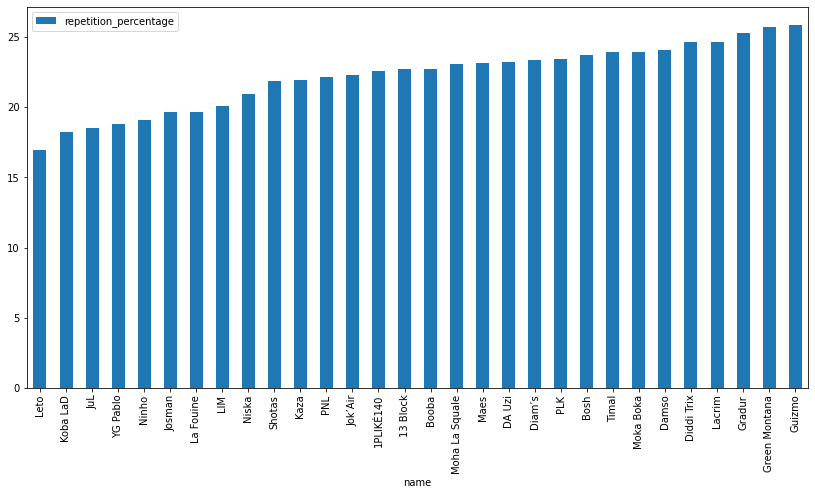

In [77]:
limit = 30

artists.head(limit).plot(kind="bar", x="name", y="repetition_percentage", figsize=(14, 7))

## Les artistes se répétant le plus

<AxesSubplot:xlabel='name'>

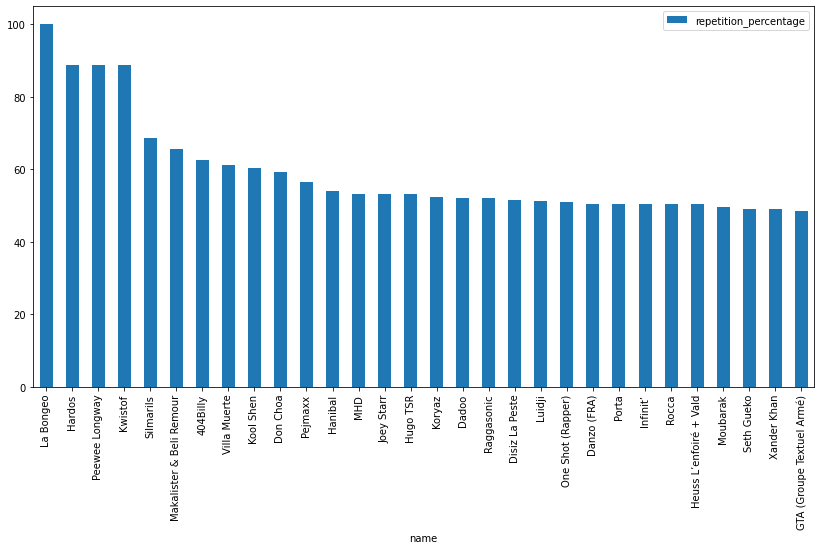

In [78]:
limit = 30

artists.tail(limit).sort_values("repetition_percentage", ascending=False).plot(kind="bar", x="name", y="repetition_percentage", figsize=(14, 7))